In [1]:
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Baseline removal algorithms

There are a two algorithms currently implemented in ramanTools that can be used for automatic baseline removal;
1. Modpoly
1. morph_br

A demonstration of each algorithm on **synthetic* and **real experimental** data is presented below. Using **synthetic** spectra allows us to make quantitative comparaison between the results given by a baseline removal algorithms and the original raman/baseline signals given by the synthetic generation. It also makes it straight forward to test algorithms in a controlled manner for different Raman/Baseline ratios and SNRs. Finally, tests on **real experimental** data can be performed to confirm the algorithm performance.

## Baseline removal on *synthetic* data

### Synthetic data generation

A small dataset of **synthetic** data is generated using the `nylon` Raman and `Aluminium` baseline. Each spectra will be generated with different parameters;

**Generation parameters**
1. Raman/Baseline ratio = 0.5 | noise level = 0
1. Raman/Baseline ratio = 0.5 | noise level = 0.01
1. Raman/Baseline ratio = 0.5 | noise level = 0.05
1. Raman/Baseline ratio = 0.2 | noise level = 0
1. Raman/Baseline ratio = 0.2 | noise level = 0.01
1. Raman/Baseline ratio = 0.2 | noise level = 0.05

The data is stored in a list of dictionary. The dictionary keys are ['s','r','b','n'] for 'spectrum', 'raman', 'baseline' and 'noise'.


In [2]:
from orpl.synthetic import gen_synthetic_spectrum

# Generation function
ratios = [0.5, 0.2]
noiselvls = [0, 0.01, 0.05]
def gen_slist(preset):
    '''
        Generates a list of synthetic spectra using the ratios and noiselvls
    '''
    slist = []
    for rf_ratio in ratios:
        for noise in noiselvls:
            s,r,b,n = gen_synthetic_spectrum(preset, rf_ratio, noise,
                                              baseline_preset='aluminium')
            slist.append({'s':s, 'r':r, 'b':b, 'n':n})
    return slist

# Generation of nylon data
nylon_0 = gen_slist('nylon')  # the _0 denotes this is the synthetic OG data

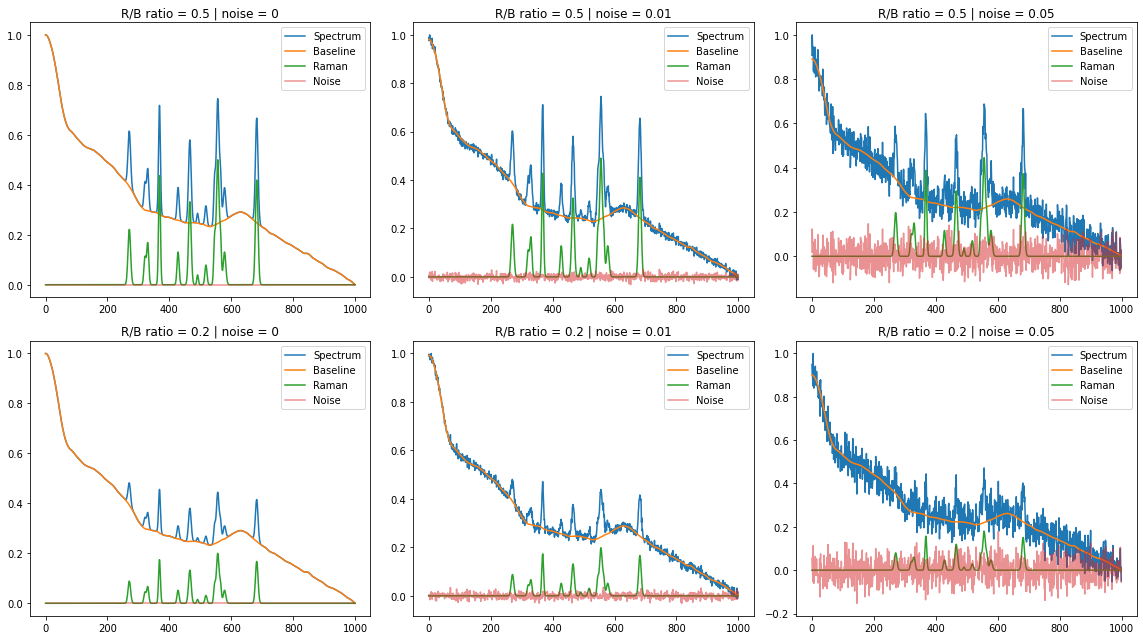

In [3]:
# Plotting of generated data

plt.figure(figsize=[16,9])

for i in range(len(nylon_0)):
    plt.subplot(2, 3, i+1)
    plt.title('R/B ratio = {} | noise = {}'.format(ratios[i>2], noiselvls[i%3])) # This is clever...
    plt.plot(nylon_0[i]['s'], label='Spectrum')
    plt.plot(nylon_0[i]['b'], label='Baseline')
    plt.plot(nylon_0[i]['r'], label='Raman')
    plt.plot(nylon_0[i]['n'], label='Noise', alpha = 0.5)
    plt.legend()

plt.tight_layout()

# plt.savefig('br_synth.svg')

### Baseline removal with imodpoly

In [4]:
from orpl.baseline_removal import imodpoly

# baseline removal
imod_r = []
imod_b = []
for spectrum in nylon_0:
    raman, baseline = imodpoly(spectrum['s'])
    imod_r.append(raman)
    imod_b.append(baseline)

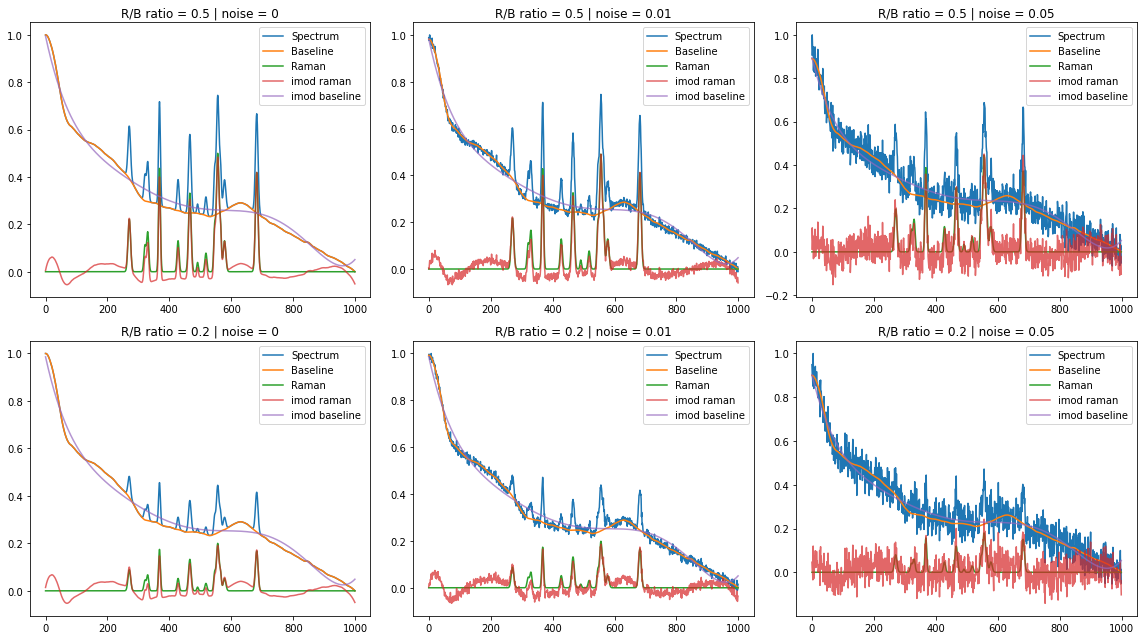

In [5]:
# Plotting results

plt.figure(figsize=[16, 9])

for i in range(len(nylon_0)):
    plt.subplot(2, 3, i+1)
    plt.title('R/B ratio = {} | noise = {}'.format(ratios[i>2], noiselvls[i%3])) # This is clever...
    plt.plot(nylon_0[i]['s'], label='Spectrum')
    plt.plot(nylon_0[i]['b'], label='Baseline')
    plt.plot(nylon_0[i]['r'], label='Raman')
    plt.plot(imod_r[i], label='imod raman', alpha = 0.7)
    plt.plot(imod_b[i], label='imod baseline', alpha = 0.7)
    plt.legend()

plt.tight_layout()

### Baseline removal with morph_br

In [6]:
from orpl.baseline_removal import morph_br

# baseline removal
morph_r = []
morph_b = []
for spectrum in nylon_0:
    raman, baseline = morph_br(spectrum['s'], 25)
    morph_r.append(raman)
    morph_b.append(baseline)

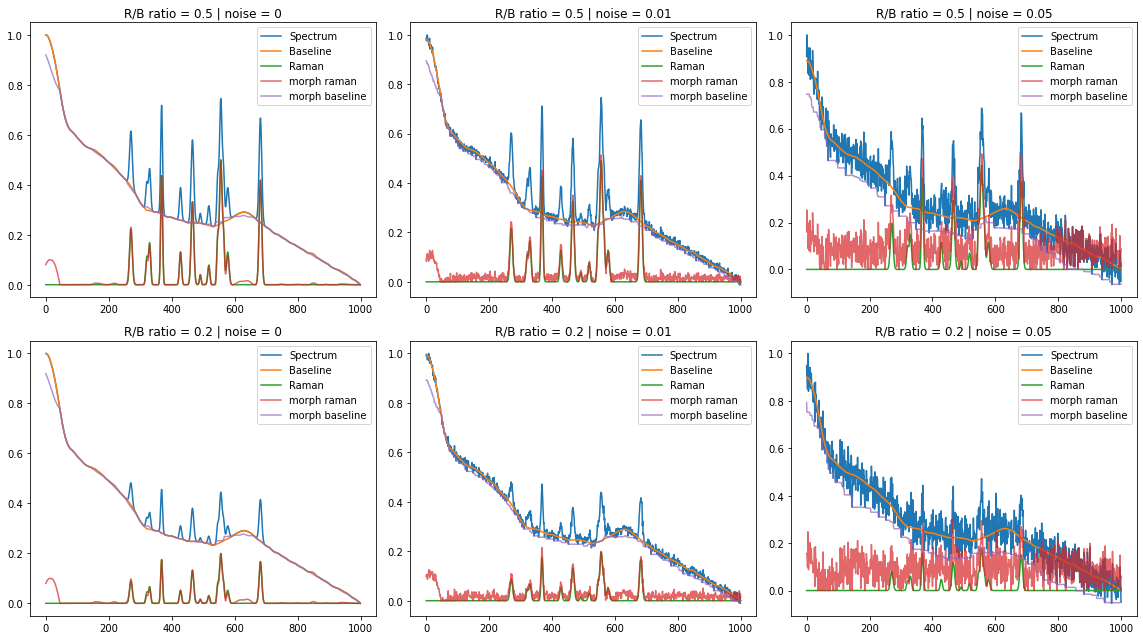

In [ ]:
# Plotting results

plt.figure(figsize=[16, 9])


for i in range(len(nylon_0)):
    plt.subplot(2, 3, i+1)
    plt.title('R/B ratio = {} | noise = {}'.format(ratios[i>2], noiselvls[i%3])) # This is clever...
    plt.plot(nylon_0[i]['s'], label='Spectrum')
    plt.plot(nylon_0[i]['b'], label='Baseline')
    plt.plot(nylon_0[i]['r'], label='Raman')
    plt.plot(morph_r[i], label='morph raman', alpha = 0.7)
    plt.plot(morph_b[i], label='morph baseline', alpha = 0.7)
    plt.legend()

plt.tight_layout()

### Baseline removal with bubblefill

In [8]:
from orpl.baseline_removal import bubblefill

# baseline removal
bbf_r = []
bbf_b = []
for spectrum in nylon_0:
    raman, baseline = bubblefill(spectrum['s'], min_bubble_widths=75)
    bbf_r.append(raman)
    bbf_b.append(baseline)

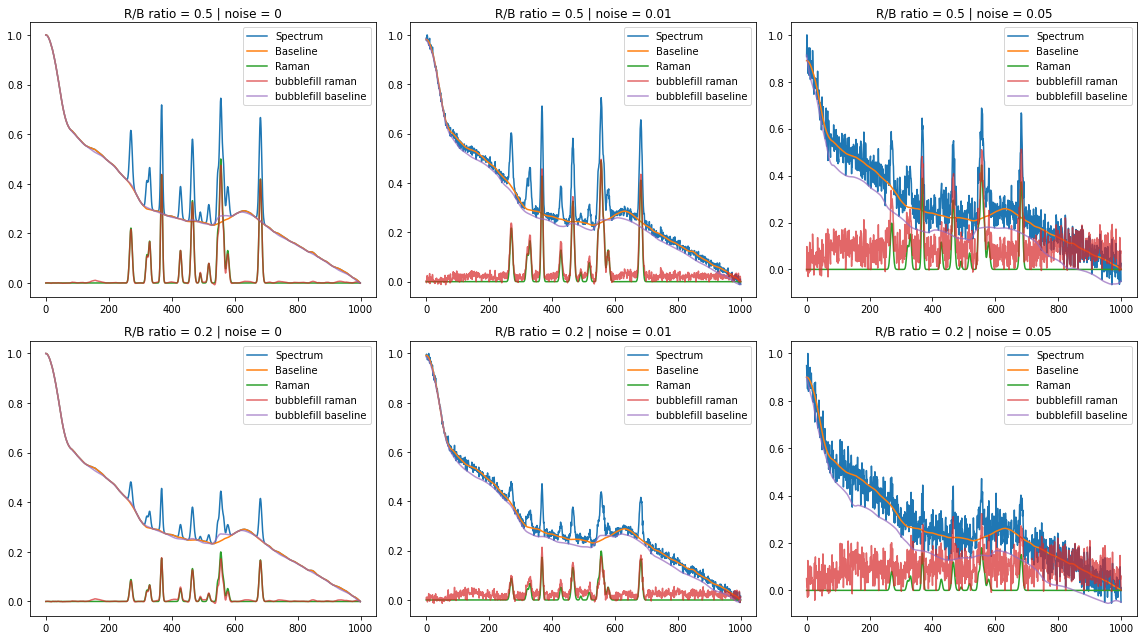

In [9]:
# Plotting results

plt.figure(figsize=[16, 9])


for i in range(len(nylon_0)):
    plt.subplot(2, 3, i+1)
    plt.title('R/B ratio = {} | noise = {}'.format(ratios[i>2], noiselvls[i%3])) # This is clever...
    plt.plot(nylon_0[i]['s'], label='Spectrum')
    plt.plot(nylon_0[i]['b'], label='Baseline')
    plt.plot(nylon_0[i]['r'], label='Raman')
    plt.plot(bbf_r[i], label='bubblefill raman', alpha = 0.7)
    plt.plot(bbf_b[i], label='bubblefill baseline', alpha = 0.7)
    plt.legend()

plt.tight_layout()

## Baseline removal on Experimental Bacon spectrum

The data used for this demo is from the bacon acquisition. We'll do two example; first from high snr fat tissue (Bacon acquisition #3), second from low snr muscle tissue (Bacon acquisition #2).

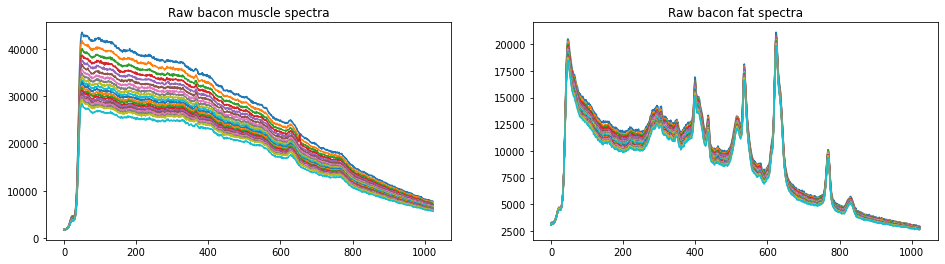

In [10]:
# Loading bacon data
bacon = json.load(open('data/samples/bacon/bacon.json'))
nist = json.load(open('data/samples/bacon/standard.json'))
muscle = bacon[1]['RawSpectra']
fat = bacon[2]['RawSpectra']

# Keeping only an average nist spectrum
nist_raw = np.array(nist[1]['RawSpectra']).mean(axis=1)

# Converting muscle and fat to numpy arrays
muscle_raw = np.array(muscle)
fat_raw = np.array(fat)

# Plotting raw spectra
plt.figure(figsize=[16, 4])
plt.subplot(1,2,1)
plt.title('Raw bacon muscle spectra')
plt.plot(muscle_raw);
plt.subplot(1,2,2)
plt.title('Raw bacon fat spectra')
plt.plot(fat_raw);


#### Processing prior to baseline removal
see other demos for details about this...

In [11]:
from orpl.calibration import compute_irf

# Cropping spectra and nist
cutoff = 50

muscle = muscle_raw[cutoff:, :]
fat = fat_raw[cutoff:, :]
nist = nist_raw[cutoff:]

# System correction
sys_r = compute_irf(nist)

# Correction
muscle = (muscle.transpose()/sys_r).transpose()
fat = (fat.transpose()/sys_r).transpose()


### Baseline removal

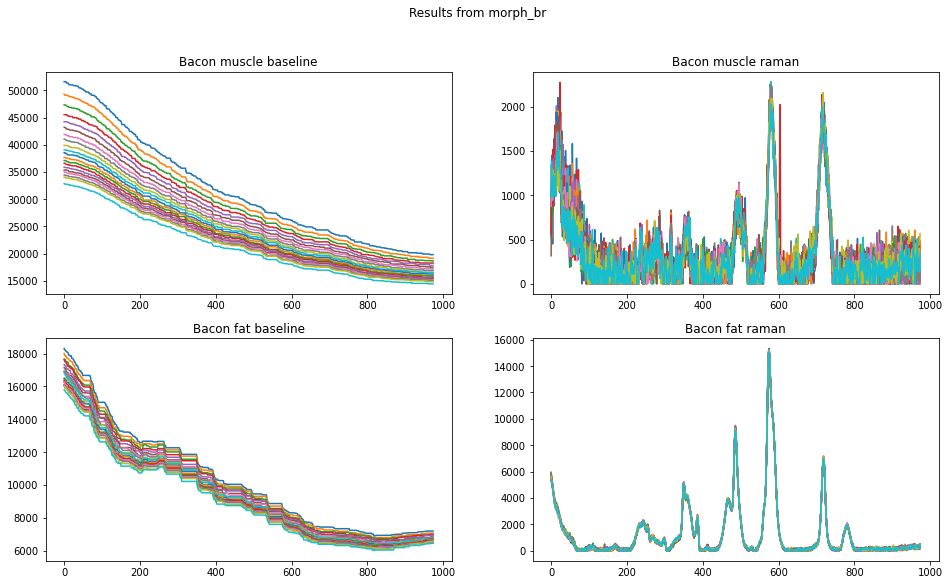

In [12]:
# baseline removal with morph_br
hws = 40

muscle_r = []
muscle_b = []
for s in muscle.transpose():
    r, b = morph_br(s, hws)
    muscle_r.append(r)
    muscle_b.append(b)

    
fat_r = []
fat_b = []
for s in fat.transpose():
    r, b = morph_br(s, hws)
    fat_r.append(r)
    fat_b.append(b)

# Plotting results
plt.figure(figsize=[16, 9])
plt.suptitle('Results from morph_br')
plt.subplot(2,2,1)
plt.title('Bacon muscle baseline')
for s in muscle_b:
    plt.plot(s)
plt.subplot(2,2,2)
plt.title('Bacon muscle raman')
for s in muscle_r:
    plt.plot(s)
plt.subplot(2,2,3)
plt.title('Bacon fat baseline')
for s in fat_b:
    plt.plot(s)
plt.subplot(2,2,4)
plt.title('Bacon fat raman')
for s in fat_r:
    plt.plot(s)

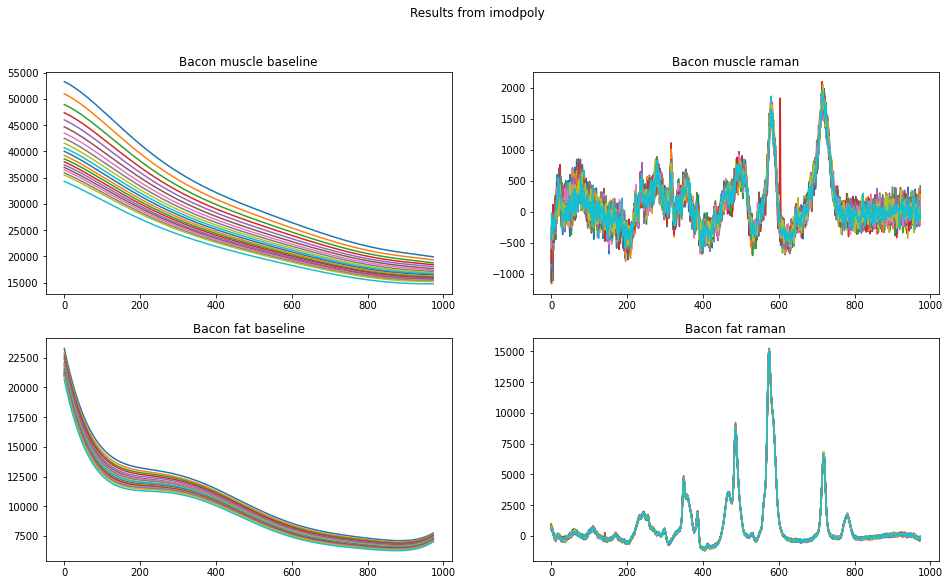

In [13]:
# baseline removal with imodpoly
muscle_r = []
muscle_b = []
for s in muscle.transpose():
    r, b = imodpoly(s)
    muscle_r.append(r)
    muscle_b.append(b)

    
fat_r = []
fat_b = []
for s in fat.transpose():
    r, b = imodpoly(s)
    fat_r.append(r)
    fat_b.append(b)

# Plotting results
plt.figure(figsize=[16, 9])
plt.suptitle('Results from imodpoly')
plt.subplot(2,2,1)
plt.title('Bacon muscle baseline')
for s in muscle_b:
    plt.plot(s)
plt.subplot(2,2,2)
plt.title('Bacon muscle raman')
for s in muscle_r:
    plt.plot(s)
plt.subplot(2,2,3)
plt.title('Bacon fat baseline')
for s in fat_b:
    plt.plot(s)
plt.subplot(2,2,4)
plt.title('Bacon fat raman')
for s in fat_r:
    plt.plot(s)

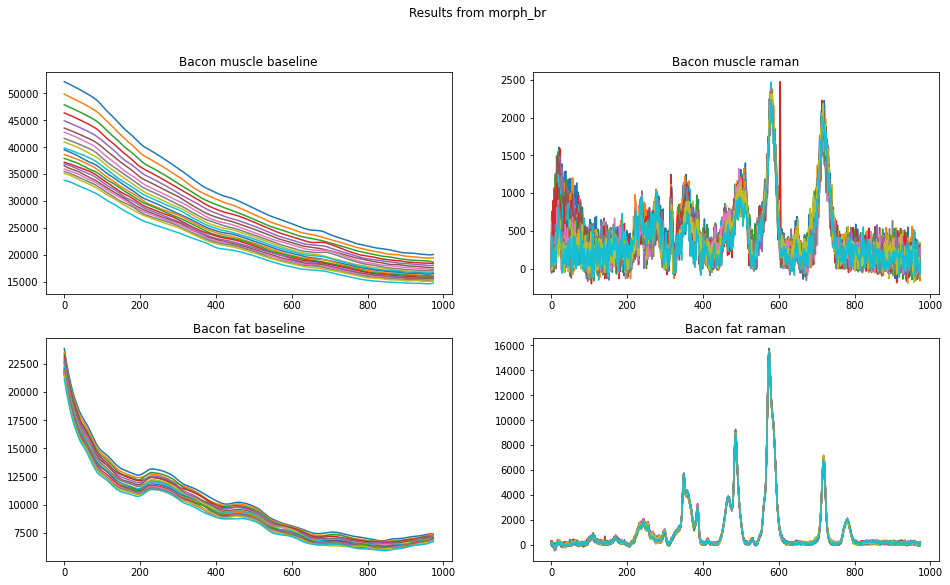

In [14]:
# baseline removal with bubblefill
bubble_width = 50

muscle_r = []
muscle_b = []
for s in muscle.transpose():
    r, b = bubblefill(s, 2*bubble_width)
    muscle_r.append(r)
    muscle_b.append(b)

    
fat_r = []
fat_b = []
for s in fat.transpose():
    r, b =  bubblefill(s, 2*bubble_width)
    fat_r.append(r)
    fat_b.append(b)

# Plotting results
plt.figure(figsize=[16, 9])
plt.suptitle('Results from morph_br')
plt.subplot(2,2,1)
plt.title('Bacon muscle baseline')
for s in muscle_b:
    plt.plot(s)
plt.subplot(2,2,2)
plt.title('Bacon muscle raman')
for s in muscle_r:
    plt.plot(s)
plt.subplot(2,2,3)
plt.title('Bacon fat baseline')
for s in fat_b:
    plt.plot(s)
plt.subplot(2,2,4)
plt.title('Bacon fat raman')
for s in fat_r:
    plt.plot(s)